# Dynamical systems - Solution operator with ODEs

In [ ]:
# Import libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def vdp_system(t, z, mu1, mu2, C):

  x1, y1, x2, y2 = z

  # Equations for oscillator 1
  dx1dt = y1
  dy1dt = mu1*(1 - x1**2)*y1 - x1 + C*(x2 - x1)

  # Equations for oscillator 2
  dx2dt = y2
  dy2dt = mu2*(1 - x2**2)*y2 - x2 + C*(x1 - x2)

  return [dx1dt, dy1dt, dx2dt, dy2dt]

In [4]:
# Parameters for the system
mu1, mu2, C = 1.0, 1.2, 0.2
params = (mu1, mu2, C)

In [5]:
# Time domain
t0, tfinal = 0, 20
dt = 0.05

# Where to evaluate the solution
t_points = np.arange(t0, tfinal+dt, dt)

In [6]:
# Initial condition
z0 = [1.5, 0.5, -0.5, 1.0]

In [7]:
# Numerical solution
sol = solve_ivp(vdp_system, [t0, tfinal], z0, t_eval=t_points,
                args=params, rtol=1e-6).y

Text(0.5, 1.0, 'van der Pol system')

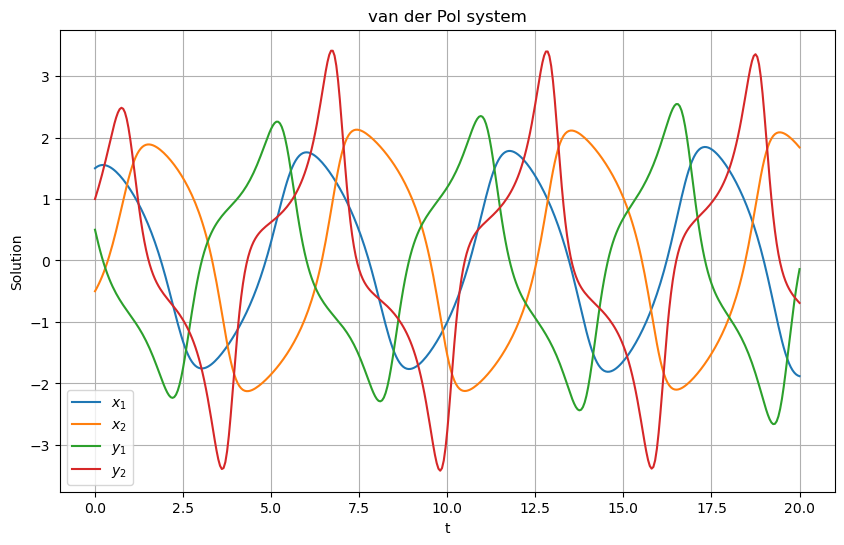

In [8]:
# Plot the solution (Time series plot)
plt.figure(figsize=(10, 6))
plt.plot(t_points, sol[0], label=f'$x_1$')
plt.plot(t_points, sol[2], label=f'$x_2$')
plt.plot(t_points, sol[1], label=f'$y_1$')
plt.plot(t_points, sol[3], label=f'$y_2$')
plt.grid()
plt.xlabel('t')
plt.ylabel('Solution')
plt.legend()
plt.title('van der Pol system')

Text(0.5, 1.0, 'Oscillator 2')

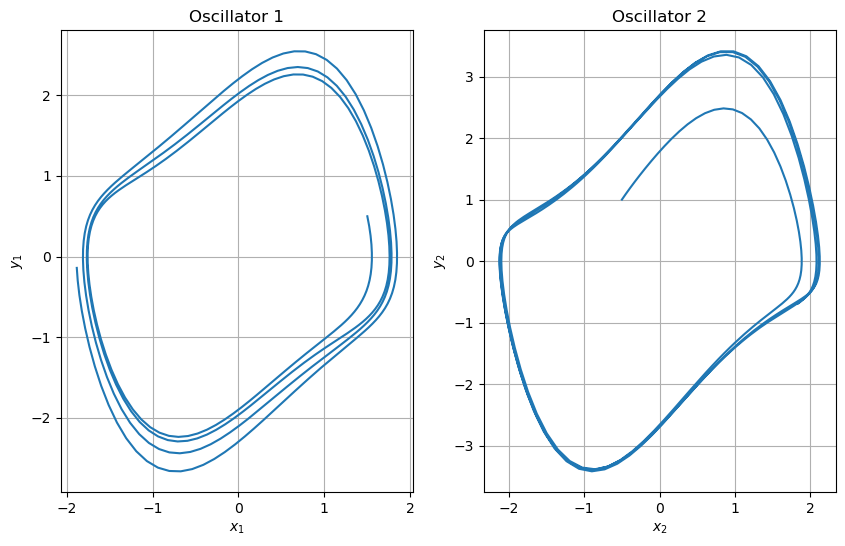

In [9]:
# Plot the solution (Phase space plot)
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(sol[0], sol[1])
plt.grid()
plt.xlabel(f'$x_1$')
plt.ylabel(f'$y_1$')
plt.title('Oscillator 1')

plt.subplot(122)
plt.plot(sol[2], sol[3])
plt.grid()
plt.xlabel(f'$x_2$')
plt.ylabel(f'$y_2$')
plt.title('Oscillator 2')